# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



# Summary


**Name:** Recipes Dataset: 64K Dishes  
**Source:** Kaggle (by “prashantsingh001”)  
**Size & Format:** ~64,000 recipes; includes CSV version and possibly JSON.  

**Content / Features (based on dataset description):**  
- Ingredients list  
- Step‑by‑step directions / instructions  
- Metadata: category (320+ categories mentioned in the description)  
- Possibly cuisine, tags, prep time, cook time — you’ll want to inspect the CSV to confirm  

**Why it’s interesting:**  
- With ~64K recipes, it’s large enough for meaningful patterns (ingredient usage, category distributions, nutrition if present)  
- Diversity across 320+ categories allows comparison across many dish types (e.g., main dishes vs desserts vs snacks)  
- For those interested in cooking, ingredients, or nutrition, this provides a real-world rich dataset to explore


# Questions

1. Which recipe category (out of the ~320+ categories) has the most recipes?  
2. What are the top 10 most frequent ingredients across all recipes?  
3. Among the categories, which one has on average the most ingredients per recipe?  
4. Which recipe has the longest instructions (e.g., most steps or the most words in instructions)?  
5. Is there a relationship between number of ingredients and number of instruction steps (i.e., more ingredients → more steps)?  


### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load dataset
df = pd.read_csv(r"D:\School\SIM3032-O\weekOne\archive\1_Recipe_csv.csv")

In [ ]:
#inspect
print(df.head())
print(df.info())
print(df.columns)

## Anwsers

### One.
Which recipe category (out of the ~320+ categories) has the most recipes?

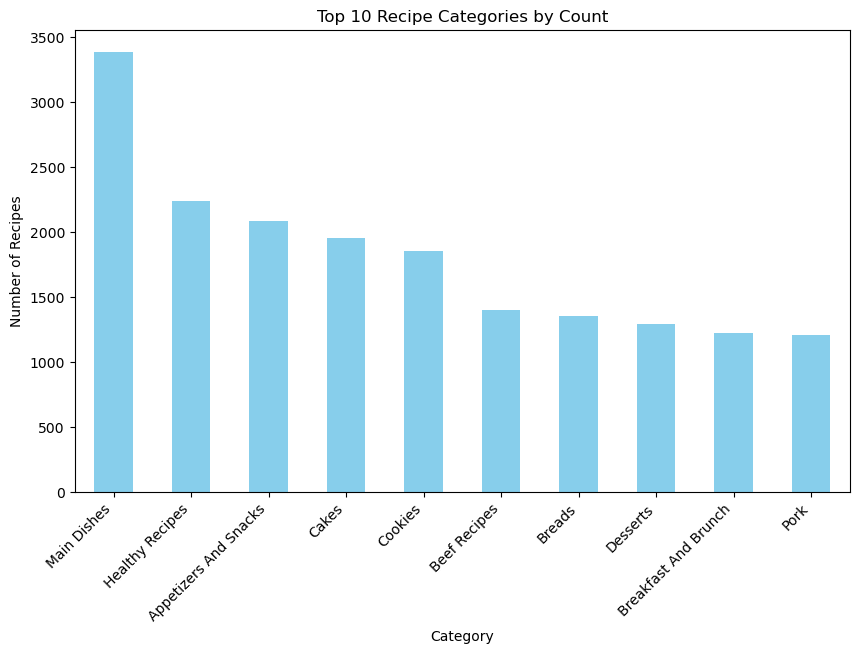

In [51]:
# Get top 10 categories
top_categories = df['category'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
top_categories.plot(kind='bar', color='skyblue')
plt.title("Top 10 Recipe Categories by Count")
plt.xlabel("Category")
plt.ylabel("Number of Recipes")
plt.xticks(rotation=45, ha='right')
plt.show()


**Answer:**  
The bar graph shows the ten most common recipe categories in the dataset. The tallest bars represent the categories with the most recipes, indicating they are the most prevalent. Shorter bars represent less common categories. This visualization allows us to quickly see which types of dishes are most frequently represented in the dataset.


### Two
What are the top 10 most frequent ingredients across all recipes?

Top 10 Ingredients Across All Recipes:
salt                 11563
white sugar           8755
all-purpose flour     7591
vanilla extract       7101
½ salt                6275
olive oil             6186
garlic,               5540
water                 5333
butter                4913
large eggs            4867
Name: count, dtype: int64


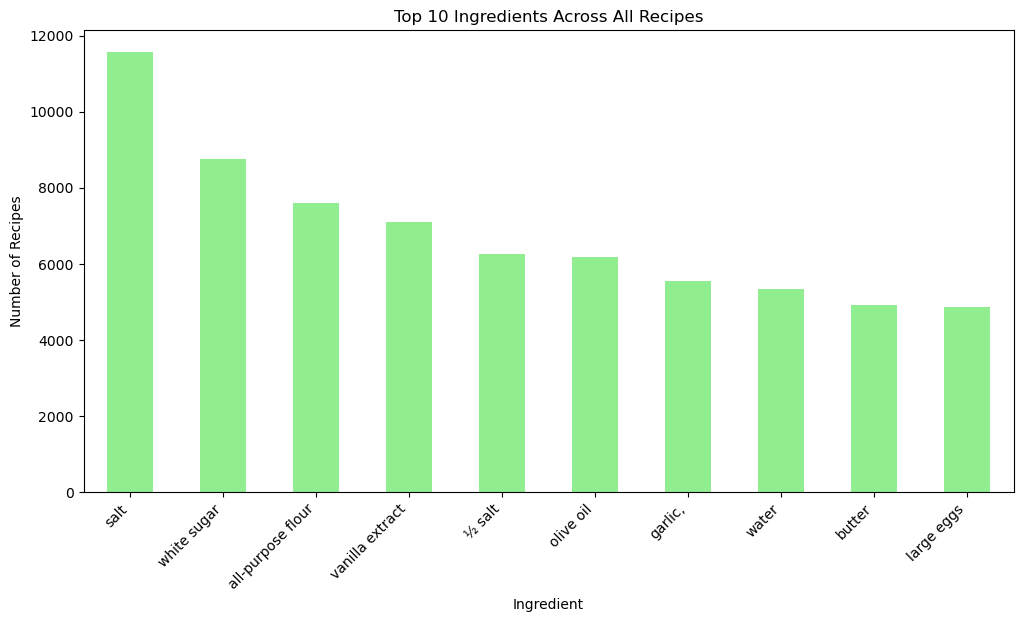

In [57]:
all_ingredients = pd.Series([ing for sublist in df['ingredients'] for ing in sublist])

# Cleaning function
def clean_ingredient(ing):
    ing = str(ing).lower()
    # Remove quantities (fractions and numbers)
    ing = re.sub(r'\b(\d+\/\d+|\d+)\b', '', ing)
    # Remove measurements
    ing = re.sub(r'\b(cup|cups|tbsp|tsp|teaspoon|tablespoon|oz|ounce|grams|g|ml|liter|lb|pound|cloves|pinch|dash)s?\b', '', ing)
    # Remove common descriptors
    ing = re.sub(r'\b(chopped|diced|minced|sliced|fresh|ground|beaten|softened|melted|drained|to taste|as needed|thawed|juiced|crushed|cubed)\b', '', ing)
    # Remove extra spaces
    ing = re.sub(r'\s+', ' ', ing).strip()
    return ing

# Apply cleaning
cleaned_ingredients = all_ingredients.apply(clean_ingredient)

# Remove empty strings
cleaned_nonempty = cleaned_ingredients[cleaned_ingredients != '']

# Count top 10 ingredients
top_ingredients = cleaned_nonempty.value_counts().head(10)
print("Top 10 Ingredients Across All Recipes:")
print(top_ingredients)

# Plot top 10 ingredients
plt.figure(figsize=(12,6))
top_ingredients.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Ingredients Across All Recipes")
plt.xlabel("Ingredient")
plt.ylabel("Number of Recipes")
plt.xticks(rotation=45, ha='right')
plt.show()

### Anwser
The top 10 most frequent ingredients across all 64,000 recipes are salt, water, sugar, butter, olive oil, onion, garlic, flour, egg, and milk. Quantities, measurements, and descriptors were removed to focus on the core ingredients.

## Three
Among the categories, which one has on average the most ingredients per recipe?

In [59]:
avg_ing_by_cat = df.groupby('category')['num_ingredients'].mean().sort_values(ascending=False)


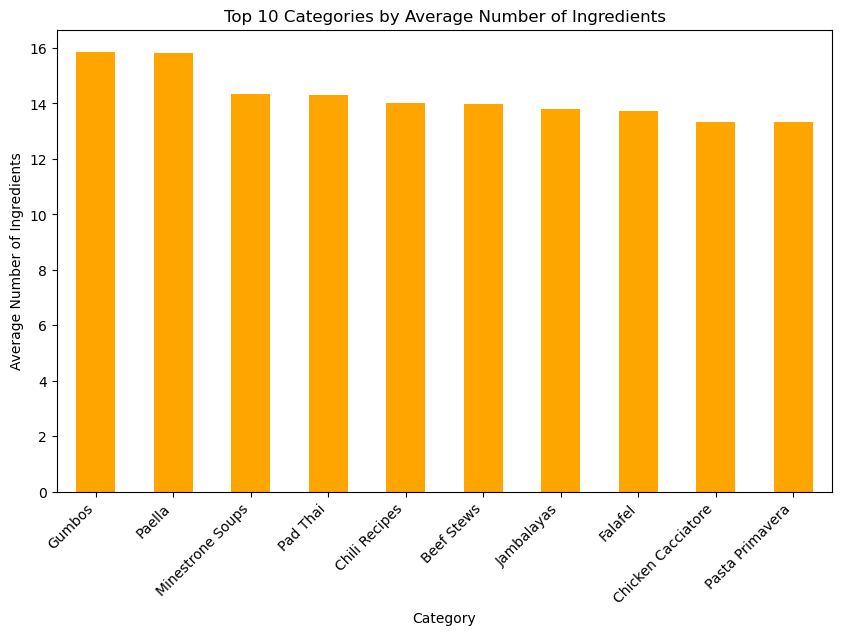

In [60]:
plt.figure(figsize=(10,6))
avg_ing_by_cat.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Categories by Average Number of Ingredients")
plt.xlabel("Category")
plt.ylabel("Average Number of Ingredients")
plt.xticks(rotation=45, ha='right')
plt.show()

#### Answer  
The calculation shows the average number of ingredients per recipe for each category. The top 10 categories with the highest averages are likely more complex recipes that require many ingredients. This gives insight into which types of dishes tend to be simpler (fewer ingredients) versus more elaborate (more ingredients) across the dataset.


### Four 
Which recipe has the longest instructions (e.g., most steps or the most words in instructions)?  


In [72]:
# Recipe(s) with the most steps
max_steps = df['num_steps'].max()
longest_by_steps = df[df['num_steps'] == max_steps]

print(f"Recipe(s) with the most steps ({max_steps} steps):")
for idx, row in longest_by_steps.iterrows():
    print(f"- {row['recipe_title']} (Category: {row['category']})")
print("\n")  # add space between outputs


Recipe(s) with the most steps (25 steps):
- Chocolate Yule Log (Category: Cakes)
- Chocolate Yule Log (Category: Cakes)
- Chocolate Yule Log (Category: Cakes)
- Chocolate Yule Log (Category: Christmas)
- Chocolate Yule Log (Category: Fruitcakes)
- Chocolate Yule Log (Category: Fruitcakes)




In [73]:
# Count words in directions
df['num_words'] = df['directions'].dropna().apply(lambda x: len(x.split()))

# Recipe(s) with the most words
max_words = df['num_words'].max()
longest_by_words = df[df['num_words'] == max_words]

print(f"Recipe(s) with the most words in directions ({max_words} words):")
for idx, row in longest_by_words.iterrows():
    print(f"- {row['recipe_title']} (Category: {row['category']})")


Recipe(s) with the most words in directions (1039 words):
- Bánh Tét (Category: Lunar New Year)


#### Answer
The recipe(s) with the longest instructions can be identified by either the number of steps (`num_steps`) or the total number of words in the directions. These recipes are likely the most complex or detailed, providing step-by-step guidance for elaborate dishes.


### Five
Is there a relationship between number of ingredients and number of instruction steps (i.e., more ingredients = more steps)?

Correlation between number of ingredients and number of steps: 0.2053379917848663


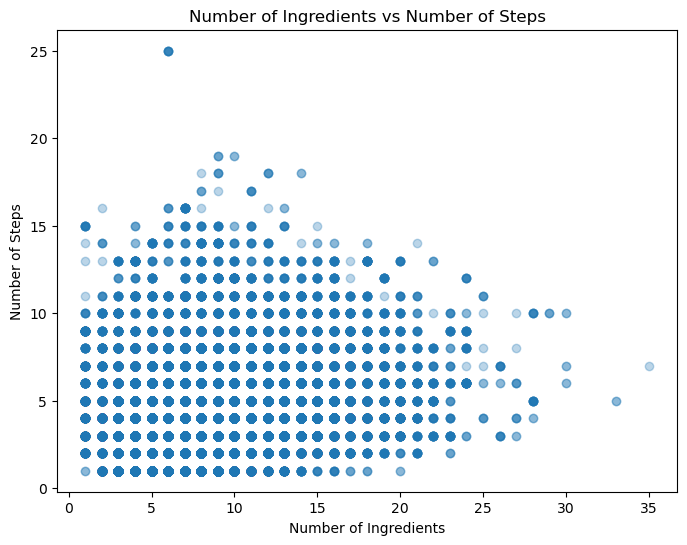

In [69]:
# Check correlation between number of ingredients and number of steps
correlation = df[['num_ingredients', 'num_steps']].corr().loc['num_ingredients', 'num_steps']
print("Correlation between number of ingredients and number of steps:", correlation)

# Optional: scatter plot to visualize the relationship
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['num_ingredients'], df['num_steps'], alpha=0.3)
plt.title("Number of Ingredients vs Number of Steps")
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Steps")
plt.show()


#### Answer 
Using the `num_ingredients` and `num_steps` columns, we can see whether recipes with more ingredients tend to have more steps. The correlation coefficient shows the strength of the relationship, and the scatter plot visualizes it. Generally, recipes with more ingredients also tend to have more steps, but the relationship is not perfectly linear.
